# AY23-24 T1 ACCT649 Lab Test 2


### Instructions
 - Only perform the steps mentioned in the instructions. Do not perform additional data preparation
 - Use this notebook for coding, then submit this file.
 - You may add additional cells in this notebook as required
 - If a question asks you to write code, you will only score marks if your code produces output from which you can determine the correct answer
 - If a question asks you to type an answer that is not code, you will only score marks if you type the correct answer




### Data description

This dataset represents data collected from police in a country.

Each row in the dataset represents a local area, which is a small rectangular area on a map.

The attributes (columns) of the dataset and their meanings are:

- region - In which larger region the local area is in
- x - The x-coordinate of the center of the local area
- y - The y-coordinate of the center of the local area
- x_range - Half of the width of the local area
- y_range - Half of the length of the local area
- local_area_size - A categorical value based on the size of the local area
- incidents - How many incidents have occurred in the local area
- arrests - How many arrests have occurred in the local area
- patrols - How many patrols on average occur in the local area per unit of time

### Important!
 - Each question is worth 3 marks
 - For most questions, full marks are scored ONLY if your code prints the correct answer, and nothing else
 - Part marks may be scored if your code still produces output from which you can determine the correct answer
 - See the examples below

## 0. (Example question and sample answers) Create a 2-D array with the values 1 and 2 in the first row, and 3 and 4 in the second row. What is the sum of integers in the second column?
[0 marks]

In [1]:
# This sample solution would only score 2 marks,
# because it does NOT only show sum of integers of second column
# (it also shows the sum of integers on the first row)
import pandas as pd
dictionary = {'first_column':[1,3], 'second_column':[2,4]}
dataframe = pd.DataFrame(dictionary)
dataframe.sum()

first_column     4
second_column    6
dtype: int64

In [2]:
# This sample solution would score 3 marks (full marks)
dictionary = {'first_column':[1,3], 'second_column':[2,4]}
dataframe = pd.DataFrame(dictionary)
dataframe['second_column'].sum()

np.int64(6)

Question: How come question says create by row, but can create by columns?

## Make sure to run this cell first:

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Read the dataset from CSV file and save into a variable called 'df'. Then show the first 5 rows of the dataframe.
[3 marks]

In [7]:
df = pd.read_csv("police.csv")
df.head()

,region,x,y,x_range,y_range,local_area_size,incidents,arrests,patrols
0,SW,1149842.696,1877758.827,1938.351906,5720.275370,small,13971,2689,854.039725
1,SW,1150150.279,1875969.757,737.137748,13754.796780,big,40533,9656,905.711272
2,SW,1150381.846,1883146.164,6457.156173,4553.813230,big,68759,19246,1020.126209
3,SW,1150397.503,1876165.074,1624.312523,2422.325833,small,4068,790,817.587021
4,SW,1150603.439,1875453.049,3353.859873,2056.304264,small,6870,1133,818.067249


## 2. How many rows and how many columns are in the dataset?
[3 marks]

In [9]:
df.shape

(200000, 9)

## 3. How many missing values are there for the variable 'patrols'?
[3 marks]

In [21]:
print(df["patrols"].isna().sum())

157


## 4. What is the range (difference between maximum and minimum) of values in the 'incidents' variable?
[3 marks]

In [20]:
print(df["incidents"].max() - df["incidents"].min())

985284


## 5. What is the standard deviation of number of patrols in the NE region? (round to 2 decimal places)
[3 marks]

In [19]:
print(round(df[df.region == "NE"]["patrols"].std(), 2))

268.0


## 4. How many local areas (rows in dataset) had more than 10,000 arrests?
[3 marks] 

In [28]:
print(len(df[df.arrests > 10000]))

152825


## 5. How many local areas (rows in dataset) had between 900 and 1,000 patrols, inclusive (including 900 and 1000)?
[3 marks]

In [29]:
print(len(df[(df.patrols >= 900) & (df.patrols <= 1000)]))

51193


## 6. What is the total number of incidents in the SW region?
[3 marks] 

In [32]:
print(df[df.region == "SW"]["incidents"].sum())

9431762107


## 7. What is the highest median of patrols, when grouping by region and local_area_size?
[3 marks] 

In [45]:
print(df.groupby(["region", "local_area_size"])["patrols"].median().max())

1295.3220625


## 8. What is the value of the variable 'x' of the local area (row in dataset) in the NW region that had the highest number of incidents?
[3 marks]

In [52]:
print(df[df.region == "NW"].sort_values("incidents", ascending = False)["x"].iloc[0])

1154329.133


## 9. Divide up the local areas (rows in dataset) into 3 categories based on the value of the variable 'incidents':

- low incident rate, with incidents values less than or equal to 330,000 incidents
- high incident rate, with incidents values greater than 660,000 incidents
- medium incident rate, with incidents values in between the above two categories

## These categories should be the values of a new variable called 'incidents_group'

## What is the lowest standard deviation of the number of patrols among these three categories?
[3 marks]

In [72]:
highest_incidents = df["incidents"].max()
df["incidents_group"] = pd.cut(df["incidents"], bins = [0, 330000, 660000, highest_incidents], labels = ["low", "medium", "high"])
print(df.groupby("incidents_group")["patrols"].std().min())

96.88444314947127


C:\Users\sbgka\AppData\Local\Temp\ipykernel_8480\456539415.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("incidents_group")["patrols"].std().min())


## 10. Create a pivot table that shows average values of arrests, with variable 'local_area_size' shown as rows and 'region' as columns. Include margin data.
[3 marks]

In [74]:
df.pivot_table("arrests", index = "local_area_size", columns = "region")

region,NE,NW,SE,SW
local_area_size,,,,
big,65893.571429,85157.020486,64596.219746,45296.096217
small,20406.272727,22455.551211,21216.194362,9826.515778


## 11. Create a pivot table that shows average number of arrests, for a small local area size, the NW region, and low incident rate. 

## Then write down this value as a comment after your code.

## Your code does NOT need to only show the above value (it's OK if your pivot shows other data as well).
[3 marks]

In [82]:
# df_filtered = df[(df.local_area_size == "small") & (df.region == "NW") & (df.incidents_group == "low")]
# df_filtered

Question: stuck with this question because my assumption is i am to filter it? or do i pivot then display out the relevant value?

## 12. Write code to show all possible combinations of only the categorical values that exist in df (you can print a dataframe, where each row is a combination).

## Each combination should only be shown once.

## Your code should NOT show any combinations of these categorical values that do not exist.

## e.g. In df, if there is no row that contains the values ['SW', 'small', 'high'] for variables ['region', 'local_area_size', 'incidents_group'], then you should not print that row.

## df should remain unchanged.
[3 marks]

In [91]:
df[["region", "local_area_size", "incidents_group"]].drop_duplicates()

,region,local_area_size,incidents_group
0,SW,small,low
1,SW,big,low
13,NW,big,low
29,NW,small,low
34,SW,big,medium
117,NW,big,medium
167,SW,small,NaN
229,NW,big,high
1570,NW,small,medium
9828,SW,big,NaN


## 13. Write code that creates a new CSV file called 'output.csv' in the same folder where this .ipynb file is saved.

## This new CSV file should only contain rows 10,000 to 20,000 inclusive (where row 0 is the first row), and only variables 'incidents' and 'arrests' (and no other columns, including indexes).

## df should remain unchanged.
[3 marks]

In [98]:
import csv

new_df = df.iloc[10000:20001][["incidents", "arrests"]]
new_df.to_csv("output.csv", index = False)

## 14. Show a diagram that displays the distribution of values of the variable 'patrols'.
[3 marks] 

<Axes: xlabel='patrols', ylabel='Count'>

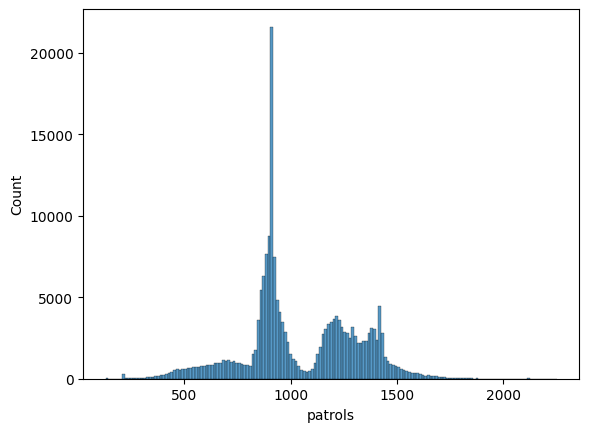

In [104]:
import seaborn as sns
%matplotlib inline

sns.histplot(df["patrols"].dropna())

## 15. Show the distribution of the variable 'y'. There should be 3 clear peaks in the distribution.

## After showing the diagram, use the diagram (without writing any more code) to determine what is the value of 'y' where the middle of the three peaks occurs at?

## In a comment, write your answer as an integer, rounded to the nearest 10,000. 
[3 marks] 

<Axes: xlabel='y', ylabel='Count'>

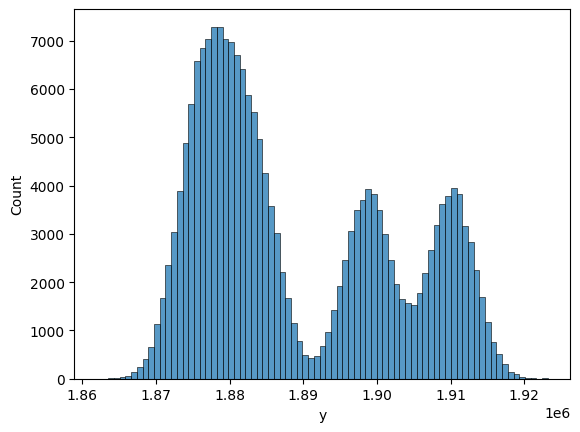

In [109]:
sns.histplot(df["y"].dropna())
# 1900000?

Question: what does 1e6 mean

## <font color="red">IMPORTANT:</font> All questions above this point involved dataframe 'df'. The questions below may ask you to use other dataframes.

## 16. Remove rows with missing values, and save the result in a new dataframe called 'df2'. 

## Then write code to make sure that this dataset should now contain 199843 rows but still have 10 columns.

## Also write code to make sure that the number of rows and columns in the original dataframe 'df' is unchanged.
[3 marks] 

In [117]:
df2 = df.dropna()
print(df.shape)
print(df2.shape)

(200000, 10)
(199843, 10)


## 17. Using df2, write code to show the correlation between all numeric variables using a heatmap.
[3 marks]

<Axes: >

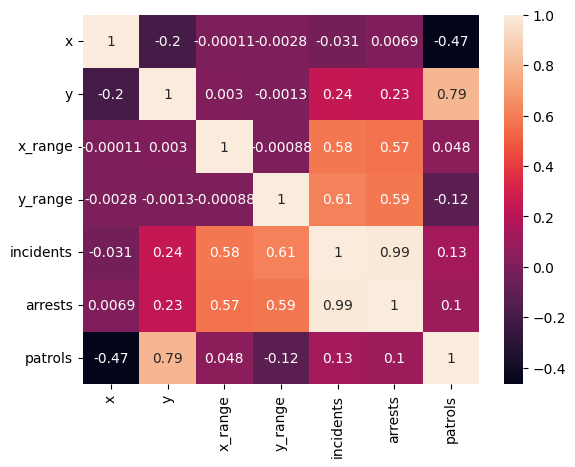

In [119]:
sns.heatmap(df2.corr(numeric_only = True), annot = True)

## 18. Using only the output of the heatmap (and no other code, nor any other information), what are the different variables that are the most correleted? Write your answer as a comment.
[3 marks]

In [126]:
# incidents and arrests with 0.99 correlation
# y and patrols with 0.79 correlation

Question: when they say "different variables" are they asking for only the highest?

## 19. From df (not df2), write code to create another dataframe df3, which contains only the variables ['x', 'y', 'x_range', 'y_range', 'incidents', 'arrests', 'patrols'].

## Show the number of rows and columns in df3.
[3 marks]

In [125]:
df3 = df[["x", "y", "x_range", "y_range", "incidents", "arrests", "patrols"]]
df3.shape

(200000, 7)

## 20. Using df3, replace all missing values in the variable 'patrols' with 1000. Store the resultant dataset in a new dataframe df4.

## df3 should remain unchanged.

## Show the average value of variable patrols for both df3 and df4.
[3 marks]

In [136]:
df3["patrols"].isna().sum()

np.int64(157)

In [150]:
df4 = df3["patrols"].fillna(1000)
print(df3["patrols"].mean())
print(df4.mean())

1042.6866300477134
1042.653121043126


Question: df4 becomes singular column because we are storing new<br>do we do df4 = df3 then change?